# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  19.1M      0  0:00:04  0:00:04 --:--:-- 20.0M
total 48
-rw-r--r--     1 jean-bricetonin  staff      0 Jun 29 13:34 README.md
-rw-r--r--@    1 jean-bricetonin  staff  20937 Jun 30 09:03 image_denoising.ipynb
drwx------  1087 jean-bricetonin  staff  34784 Jun  9 15:06 paintings
drwxr-xr-x     3 jean-bricetonin  staff     96 Jun 29 13:34 tests


In [3]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

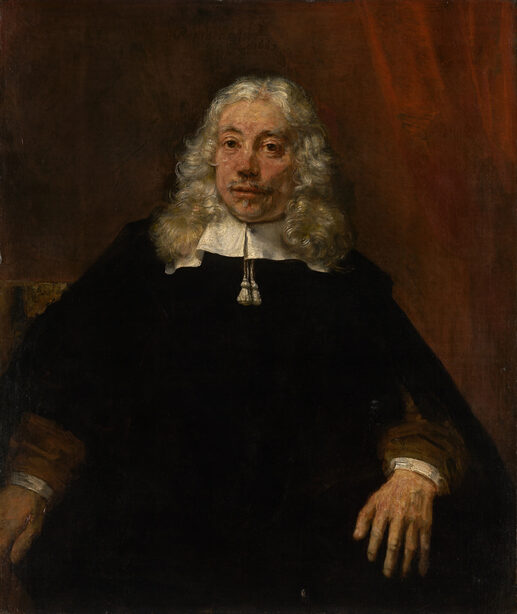

In [9]:
# YOUR CODE HERE
from PIL import Image
Image.open(dataset_paths[53])

In [11]:
image = Image.open(dataset_paths[53])

In [20]:
import numpy as np

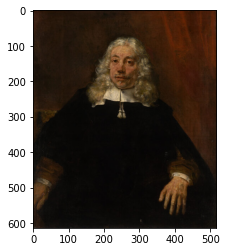

In [24]:
test_image = np.asarray(image)
plt.imshow(test_image)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [25]:
# YOUR CODE HERE
img_shape = test_image.shape
img_shape

(614, 517, 3)

In [27]:
img_dim = test_image.shape[2]
img_dim

3

❓ **What was in the image above?**

In [28]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [29]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [32]:
# YOUR CODE HERE
dataset_images = []
for path in dataset_paths:
    dataset_images.append(np.asarray(Image.open(path)))

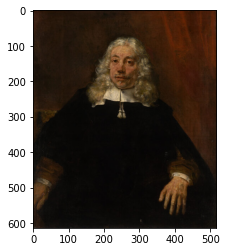

In [41]:
plt.imshow(dataset_images[53])

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [45]:
# YOUR CODE HERE
dict_dim={}
for image in dataset_images:
    dict_dim.setdefault(dataset_images[503].shape[2],0)
    dict_dim[dataset_images[503].shape[2]]+=1

In [46]:
dict_dim

{3: 1085}

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [50]:
!pip install tqdm
from tqdm import tqdm

You should consider upgrading via the '/Users/jean-bricetonin/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [51]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1161.71it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [56]:
from tensorflow.image import resize

In [57]:
dataset_images[53].shape

(614, 517, 3)

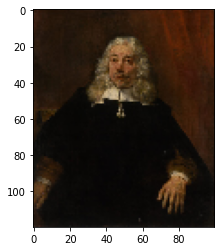

In [65]:
image_test_resize = resize(dataset_images[53],[120,100])
plt.imshow(image_test_resize/255)

In [67]:
dataset_resized = []
for image in dataset_images:
    dataset_resized.append(resize(image,[120,100]))

In [70]:
dataset_resized = np.array(dataset_resized)

In [71]:
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [74]:
# YOUR CODE HERE
dataset_scaled = dataset_resized/255


In [77]:
dataset_scaled.shape

(1085, 120, 100, 3)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [78]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

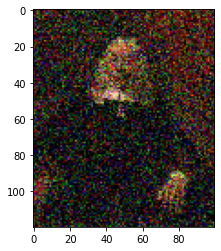

In [83]:
# YOUR CODE HERE
plt.imshow(dataset_noisy[53])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [86]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy,dataset_scaled, test_size=0.2)

In [88]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((868, 120, 100, 3),
 (217, 120, 100, 3),
 (868, 120, 100, 3),
 (217, 120, 100, 3))

In [87]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [91]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [92]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [94]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [165]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')

encoder.add(Conv2D(16, (3,3), input_shape=(120, 100, 3), activation='relu',padding='same'))
encoder.add(MaxPooling2D(2))

encoder.add(Conv2D(8, (2, 2), activation='relu',padding='same'))
encoder.add(MaxPooling2D(2))   

encoder.add(Flatten())
encoder.add(Dense(6000, activation='tanh'))

In [166]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 120, 100, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 60, 50, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 50, 8)         520       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 25, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6000)              36006000  
Total params: 36,006,968
Trainable params: 36,006,968
Non-trainable params: 0
_______________________________________________

👉 **Test your encoder below**

In [167]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              36006968  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 36,013,643
Trainable params: 36,013,643
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [117]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error

In [168]:
dataset_scaled.shape, dataset_noisy.shape

((1085, 120, 100, 3), (1085, 120, 100, 3))

In [169]:
score_baseline = mean_absolute_error(np.reshape(dataset_scaled, (1085, 36000)),np.reshape(dataset_noisy, (1085, 36000)))

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [129]:
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks

In [179]:
adam_opt = optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999)
es = callbacks.EarlyStopping(patience=8, restore_best_weights=True)

In [180]:
# YOUR CODE HERE
autoencoder.compile(loss='binary_crossentropy', optimizer=adam_opt,metrics='mae')

In [181]:
history = autoencoder.fit(X_train, Y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es],
          verbose=1)

Epoch 1/100
44/44 [==============================] - 15s 314ms/step - loss: 0.7464 - mae: 0.2538 - val_loss: 0.6813 - val_mae: 0.2347
Epoch 2/100
44/44 [==============================] - 14s 312ms/step - loss: 0.6798 - mae: 0.2335 - val_loss: 0.6819 - val_mae: 0.2370
Epoch 3/100
44/44 [==============================] - 15s 350ms/step - loss: 0.6810 - mae: 0.2323 - val_loss: 0.6817 - val_mae: 0.2367
Epoch 4/100
44/44 [==============================] - 14s 321ms/step - loss: 0.6826 - mae: 0.2360 - val_loss: 0.6809 - val_mae: 0.2349
Epoch 5/100
44/44 [==============================] - 14s 330ms/step - loss: 0.6808 - mae: 0.2334 - val_loss: 0.6817 - val_mae: 0.2366
Epoch 6/100
44/44 [==============================] - 14s 309ms/step - loss: 0.6809 - mae: 0.2310 - val_loss: 0.6814 - val_mae: 0.2362
Epoch 7/100
44/44 [==============================] - 14s 309ms/step - loss: 0.6832 - mae: 0.2347 - val_loss: 0.6807 - val_mae: 0.2355
Epoch 8/100
44/44 [==============================] - 14s 323ms

In [173]:
autoencoder.evaluate(X_test,Y_test)

7/7 [==============================] - 1s 94ms/step - loss: 0.5770 - mae: 0.1217


[0.5770131945610046, 0.1216796264052391]

❓ **Plot your training and validation loss at each epoch using the cell below**

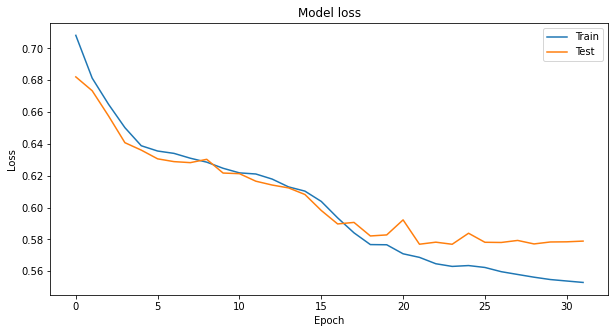

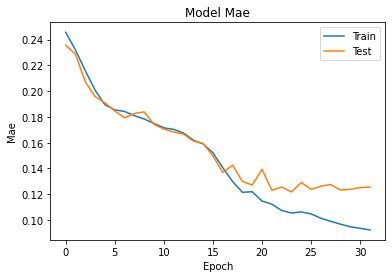

<Figure size 432x288 with 0 Axes>

In [174]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Mae')
    plt.ylabel('Mae')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

fig, axs = plt.subplots(1,1, figsize=(10,5))
plot_loss_accuracy(history)
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [175]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(X_test)

In [176]:
score_test = autoencoder.evaluate(Y_pred,Y_test)

7/7 [==============================] - 1s 94ms/step - loss: 0.5987 - mae: 0.1541


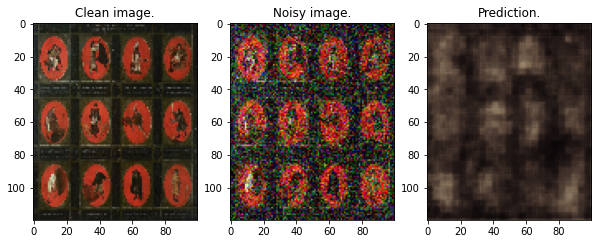

In [177]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 5

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [178]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()